In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('salary.csv')
X = df.iloc[:,0]
y = df.iloc[:,1]
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.33,random_state=0)
X_train = X_train.values.reshape(-1,1)

## Simple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict(X_test.values.reshape(-1,1))

In [9]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
22    101302
Name: Salary, dtype: int64

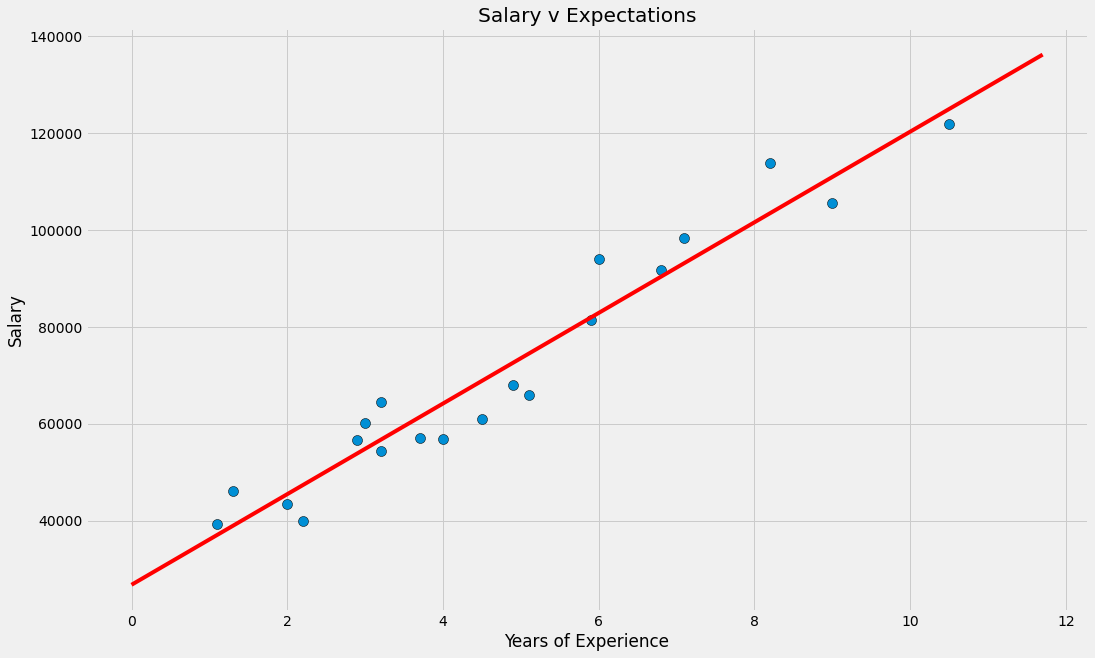

In [15]:
fit = plt.figure(figsize=(16,10))
plt.style.use('fivethirtyeight')
plt.scatter(X_train, y_train, ec='black', s=100)
plt.plot(np.arange(0,12,.3), regressor.predict(np.arange(0,12,.3).reshape(-1,1)),color='red')
plt.title('Salary v Expectations')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Fitting Model

### P value:
+ P value helps to determine the significance of the result and is used in Hypothesis testing. The hypothesis under testing is called Null Hypothesis. The lower the P value, the better the model. In short, p value tells the scope of the error, eg. if the P value is 0.02 then there is 2% chances that the claims made might not hold true. Typically, the limit of P value is set to 5%

### Backward elimination
+ Set Signifance level. Say, SL = 0.05
+ Fit model with all possible predictors.
+ Check the highest P values, if any one of them is greater than SL then, remove the variable and rebuild model.
+ Repeat until no P value is greater than SL.

### Forward Elimination
+ Set Significance level. Say, SL = 0.05
+ Make a model for every variable, choose one whose addition gives highest significance level.
+ Repeat until no additional variable additional is significant.

### Bidirectional elimination
+ Set Signifiance level of entering and staying. SLEnter = 0.05, SLStay = 0.05
+ Perform one step of forward elimination. New variables must have P < SLEnter
+ Perform all step of backward elimination. Variables should have P < SLStay to stay.
+ Repeat till equilibrium.

### All Possible model
+ Select criterion of fitness (eg. Akaine criterion)
+ Create one tree for every possible  combinations
+ Select one with best p

# Multiple Linear Regression

In [17]:
df_startup = pd.read_csv('50_startups.csv')
df_startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
X = df.iloc[:,:-1]
y = df['Profit']

In [19]:
# one hot encode the "State" column
X = pd.get_dummies(X, columns=['State'])

In [20]:
# avoid dummy variable trap; remove last column
X = X.iloc[:, :-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)


In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [23]:
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[101818.58738692 135528.6007816  135664.64259063  74956.31104908
 182276.18673284 114279.80403011  69606.52160903  97617.29632021
 114833.30513844 172277.13381667]
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64
